In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import copy

## Лабораторная работа №5
Численное решение системы линейных уравнений, численное интегрирование

** Цель работы: **
научиться считать определенные интеграллы и решать системы линейных уравнений численными методами и с помощью встроенных библиотек. 

** Вычисление интеграла :  **
используем квадратурную формулу Буля(n=4)
$$ \sum^{4}_{k=0}C^{(4)}_{k}f(x_{k}^{(4)}) = \frac{(\beta - \alpha)}{90}(7f(\alpha) + 32f(\frac{3\alpha +\beta}{4}) + 12f(\frac{\alpha +\beta}{2}+ 32f(\frac{\alpha +3\beta}{4}) + 7f(\beta)) $$

In [1]:
e = 0.001
n = 10
def f(t, p):
    s = np.sin(t-5)/(1+p*t+p*(t**2))
    return s
def integral(i, p):
    s = 0
    sped = 0
    ot = 10
    while (abs(np.sum(s)-sped)/abs(np.sum(s)))>e:
        l = ot/i
        sped = np.sum(s)
        anach = np.arange(0, ot, l)
        bkonh = np.arange(l, ot+l, l)
        s += ((bkonh-anach)/90)*(7*f(anach, p) + 32*f((3*anach+bkonh)/4, p) + 12*f((anach+bkonh)/2, p) + 32*f((anach+3*bkonh)/4, p)+7*f(bkonh, p))
        ot+=1
        if ot>100:
            print('breake')
            break
        print(np.sum(s))
    return s
N = np.zeros((n))
y = []
x = []
for k in range (n):
    i=1
    a=1
    b=0
    w=0
    Flag = False
#     print(integral(i, k)/integral(i*2, k)-1)
    while Flag==False :
        b = a
        a = np.sum(integral(i, k))
#         print(a, b, abs(a/b-1))
        if (abs(a/b-1) < e):
            Flag = True
        
        if k==1:
            y.append(np.sum(integral(i, k)))
            x.append(i)
            w= w+1
        i=i*2 
#         print(i)
    N[k]=np.sum(integral(i, k)) - 10
x1 = np.zeros((6))
y1 = np.zeros((6))
for i in range (n):
#     x1[i] = i
#     y1[i]=f(i, 1)
    print(N[k])


NameError: name 'np' is not defined

In [ ]:
def f2(t, p):
    s = mt.sin(t)*mt.exp(- p**2 *t**2)
    return s



Построим графики подинтегральной функции и график значения интеграла от номера итерации (приведены примеры для первой функции)

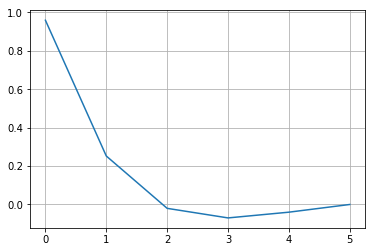

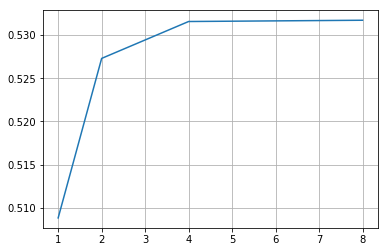

In [55]:

plt.plot(x1, y1)
plt.grid()
plt.show()
plt.plot(x, y)
plt.grid()
plt.show()

[ 0.95892427 -0.06138176]
[ 0.95892427  0.14991772 -0.06138176 -0.05044437]
[ 0.95892427  0.46815365  0.14991772 -0.00259629 -0.06138176 -0.06868559
 -0.05044437 -0.0238663 ]


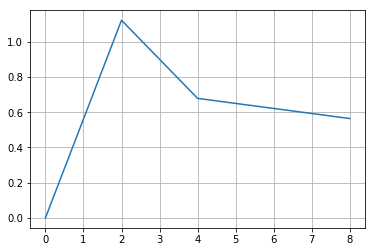

In [27]:
s = np.zeros((4))
lo = np.zeros((4))


def integraltrabs(i, p):
    s1 = 0
    l = 5/i
    anach = np.arange(0, 5.01, l)
    lp = np.zeros((i))
    for j in range (i):
        lp[j]=f(anach[j], 1)
    print(lp)
    s1 = np.trapz(lp, dx=(5/(i)))

    return s1
for j in range(1, 4):
    i=2**j
    s[j]=integraltrabs(i, 1)
    lo[j] = i
plt.plot(lo, s)
plt.grid()
plt.show()

Зададим матрицу, содержащую коэффициенты уравнений:

In [4]:
def coeff(i):
    return 10+(mt.cos(i)/(i**2+i+1))
n = 100
M=np.zeros((n,n))
M[0,0] = 10
M[n-1,n-1] = 1
M[n-1,n-2] = 1
M[n-2,n-1] = 1
for i in range(1,n-1):
    M[i, i] = coeff(i)
    M[i-1, i] = 1
    M[i, i-1] = 1
np.set_printoptions(suppress=True, precision =4, linewidth=100)
print(M)

[[ 10.       1.       0.     ...,   0.       0.       0.    ]
 [  1.      10.1801   1.     ...,   0.       0.       0.    ]
 [  0.       1.       9.9406 ...,   0.       0.       0.    ]
 ..., 
 [  0.       0.       0.     ...,   9.9999   1.       0.    ]
 [  0.       0.       0.     ...,   1.       9.9999   1.    ]
 [  0.       0.       0.     ...,   0.       1.       1.    ]]


Решим для n=1000 и n=10000 методом Гаусса-Зейделя систему 
$$x_1 = 10$$
$$x_{i-1}+(10+cos(i)/(i^2+i+1))x_i+x_{i+1}= -10+\int_0^5\frac{sin(t+5)}{1+it+it^2}dt, i=\overline{2,n-1}$$
$$x_n = 1$$

Метод Гаусс-Зейделя

Итерационными называются приближенные методы, в которых решение системы получается как предел последовательности векторов $$(x^k)_{k=1}^{\infty}$$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальный элемент $$x^1$$ выбирается произвольно.
Условие сходимости
$${\parallel\frac{x^{k+1}-x^{k}}{x^k}\parallel < \epsilon}$$

Покоординатная форма

$$x_1^{k+1} = (b_1-a_{12}x_2^k - ... - a_{1n}x_n^k)/a_{11}$$
$$x_2^{k+1} = (b_2-a_{21}x_2^{k+1} - ... - a_{2n}x_n^k)/a_{22}$$
$$...................................$$
$$x_n^{k+1} = (b_n-a_{n1}x_1^{k+1} - ... - a_{nn-1}x_{n-1}^{k+1})/a_{nn}$$

1
2
3
4
5
-0.996342379335
-0.00159139661167
-0.753047656204
-0.123177538844
-0.80597103553
-0.0936805653108
-0.808672380697
-0.0922273894799
-0.809366173779
-0.0918549502385
-0.809284691804
-0.0918986745189
-0.810587458749
-0.0912001198617
-0.813024957767
-0.0898961224818
-0.815557982282
-0.0885451572602
-0.817317909673
-0.0876089843961
-0.818138981494
-0.0871729142153
-0.81846081187
-0.0870021098941
-0.818850641177
-0.0867953065768
-0.819576402958
-0.0864105541907
-0.820509631464
-0.0859163166621
-0.821337303569
-0.0854784519
-0.821855897556
-0.0852043240446
-0.822112411242
-0.0850687953015
-0.822318381569
-0.0849600016966
-0.822651732908
-0.0847839831201
-0.823124577767
-0.0845344304712
-0.823608238884
-0.0842793176102
-0.823966286786
-0.0840905574318
-0.824170579197
-0.0839828927481
-0.824308812444
-0.0839100572166
-0.824494909997
-0.0838120211198
-0.824771431671
-0.0836663905016
-0.825085791519
-0.0835008916367
-0.825349164028
-0.0833622842615
-0.825517563923
-0.0832736821423
-0.82

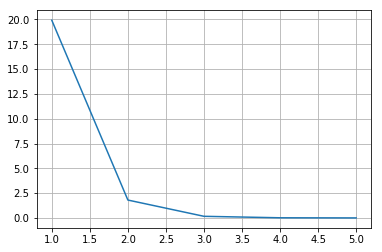

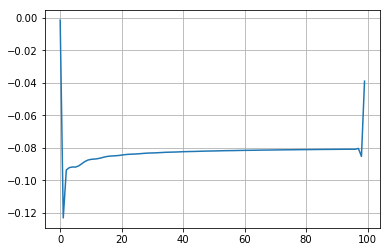

In [50]:
xk=np.zeros(n)
for i in range(n):
    xk[i]= 1
xk1 = np.zeros(n)
b = np.zeros(n)
for i in range(n):
    b[i]=1
eps = 0.01
norma = 1
m =0
Norm = list()
xr = list()
xx = list()
yy=[]
for i in range(0, n):
    xx.append(i)
while(norma>eps):
#     Заполняем координаты k+1 вектора
    H = 0
    for i in range(n):
        sum = 0
        for j in range(n):
            if(j <i):
                sum += M[i, j]*xk1[j]  
            if(j>i):
                sum += M[i,j]*xk[j]
        xk1[i] =(N[i] -sum)/M[i, i]
        H+= ((xk1[i]-xk[i]))**2
    norma = mt.sqrt(H)
    Norm.append(norma)
    xr.append(m+1)

    xk = copy.copy(xk1)
    xk1 = np.zeros(n)
    m+=1
    
    
    print(m)
# print(xk)
for i in range(n):
#     print(xk[i])
    yy.append(np.log10(np.abs(xk[i])))
#     print(yy[i])
plt.plot(xr, Norm)
plt.grid()
plt.show()
plt.plot(xx, yy)
plt.grid()
plt.show()

Построим график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

Так же решим систему с помощью функции numpy.linalg.solve(…). Результат графически сравним с решением, полученным в пункте 3. 

In [8]:
b = np.zeros(n)
for i in range(n):
    b[i]=1
prov = np.linalg.solve(M, N)
print(prov)

[ -0.9963  -0.753   -0.806   -0.8087  -0.8094  -0.8093  -0.8106  -0.813   -0.8155  -0.8173  -0.8181
  -0.8184  -0.8188  -0.8196  -0.8205  -0.8213  -0.8218  -0.8221  -0.8223  -0.8226  -0.8231  -0.8236
  -0.824   -0.8242  -0.8243  -0.8245  -0.8248  -0.8251  -0.8253  -0.8255  -0.8256  -0.8257  -0.8259
  -0.8261  -0.8263  -0.8265  -0.8266  -0.8266  -0.8268  -0.8269  -0.8271  -0.8272  -0.8273  -0.8273
  -0.8274  -0.8275  -0.8277  -0.8278  -0.8278  -0.8279  -0.8279  -0.828   -0.8281  -0.8282  -0.8283
  -0.8283  -0.8284  -0.8284  -0.8285  -0.8286  -0.8287  -0.8287  -0.8287  -0.8288  -0.8289  -0.8289
  -0.829   -0.829   -0.829   -0.8291  -0.8291  -0.8292  -0.8292  -0.8293  -0.8293  -0.8293  -0.8294
  -0.8294  -0.8295  -0.8295  -0.8295  -0.8296  -0.8296  -0.8296  -0.8297  -0.8297  -0.8298  -0.8298
  -0.8298  -0.8298  -0.8299  -0.8299  -0.8299  -0.83    -0.8299  -0.831   -0.8205  -0.9243   0.1027
 -10.0641]


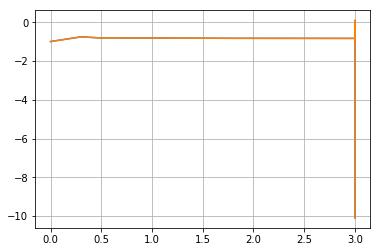

In [39]:
plt.plot(xx, xk)
plt.plot(xx, prov)
plt.grid()
plt.show()